In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import netCDF4
import numpy as np
import os
from datetime import datetime, date
import seaborn as sns

In [2]:
wavelength_array = [400, 412, 442, 490, 510, 560, 620, 665, 674, 681, 709, 754, 865, 940, 1012]

In [3]:
def smoothing(data, smooth_order=2):
    global wavelength_array
    new_dataset = dict()
    for wavelength in wavelength_array:
        new_dataset[wavelength] = np.array(data.variables[f'Rrs_{wavelength}'])
        
    if smooth_order > 0:
        for _ in range(smooth_order):
            for current_band, next_band in zip(wavelength_array[:-smooth_order], wavelength_array[smooth_order:]):
                new_dataset[wavelength] = (new_dataset[next_band]-new_dataset[current_band])/(next_band-current_band)
        return new_dataset
    
    else:
        return data

def cal_CI_from_matrixdata(data, smooth_order=2, method='Scattering 3', bands=[490,560,510]):
    #smooth data:
    data = smoothing(data, smooth_order=smooth_order)
    band1, band2, band3 = bands
    band1_val = data[band1]
    band2_val = data[band2]
    if band3 != None:
        band3_val = data[band3]
    
    if method=='Scattering 1':
        CI_matrix = band1_val/band2_val
    if method=='Scattering 2':
        CI_matrix = (band2_val-band1_val)/(band2_val+band1_val)
    if method=='Scattering 3':
        CI_matrix = (1/band1_val - 1/band2_val)*band3_val
    if method=='Fluorescence':
        CI_matrix = band2_val - band1_val + (band1_val-band2_val)*(band2-band1)/(band3-band1)
    return CI_matrix

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'ticks'
  if __name__ == '__main__':


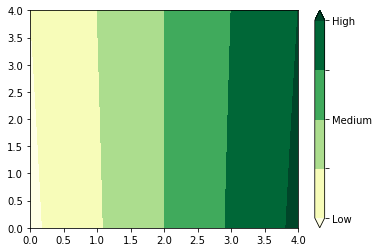

In [125]:
#Reference plot to take the color bar for other plot. 
vmin = -20
vmax = 60
matrix = [np.linspace(vmin-i, vmax+i, 5) for i in range(5)]
fig0, ax0 = plt.subplots(1, 1, )
cf0 = ax0.contourf(np.flip(matrix,0), levels=np.linspace(vmin,vmax,5),
                   ticks = [-20,0,20,40,60],
                   cmap="YlGn",
                   extend='both')
cbar0 = plt.colorbar(cf0)
cbar0.set_ticklabels(["Low",None,"Medium", None,"High"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract


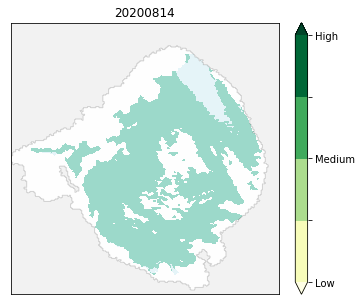

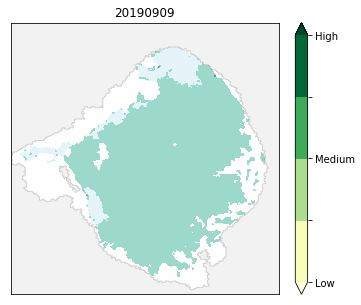

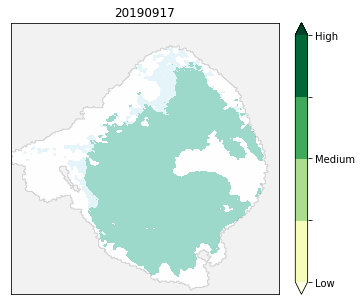

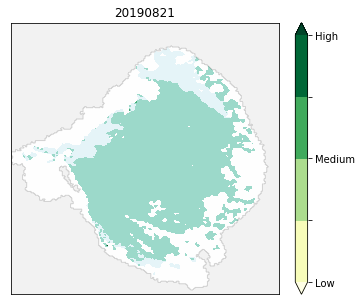

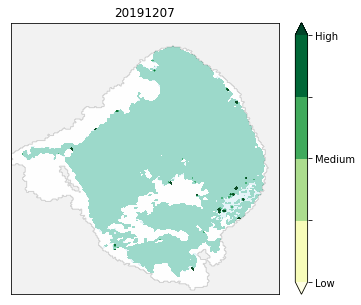

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


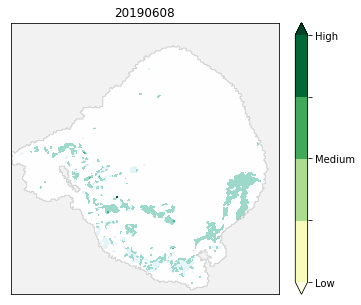

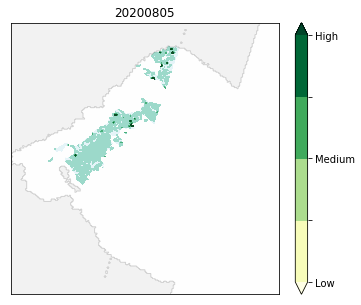

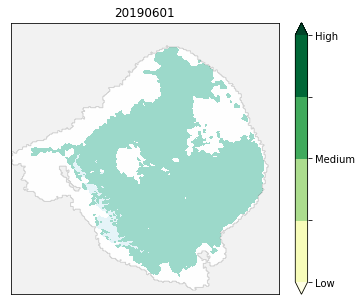

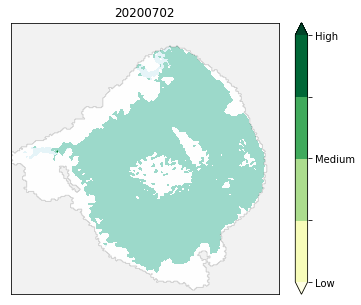

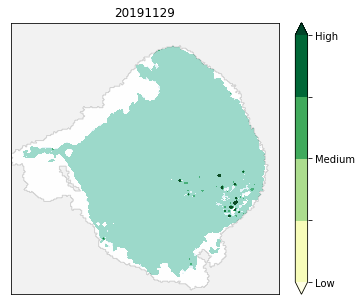

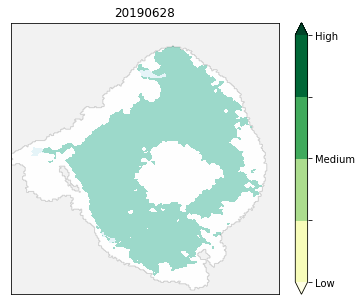

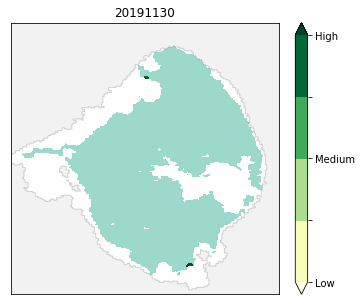

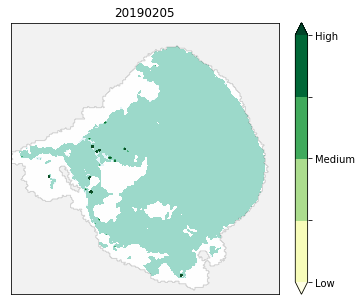

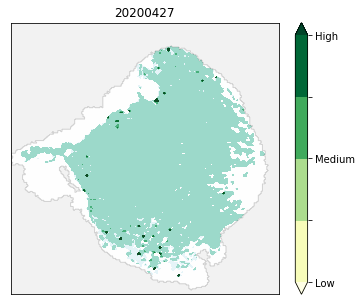

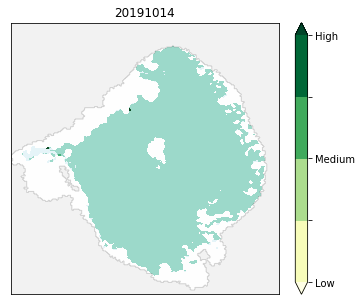

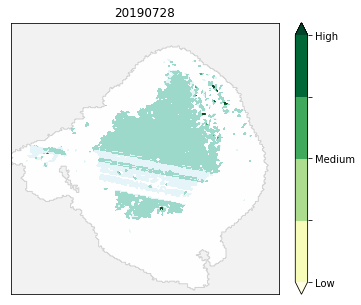

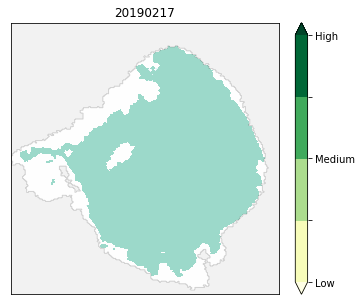

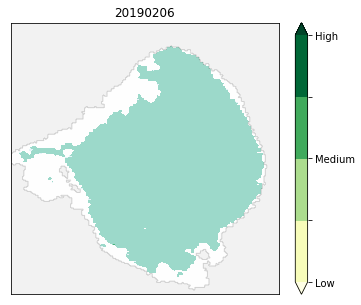

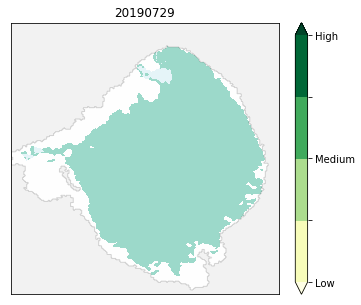

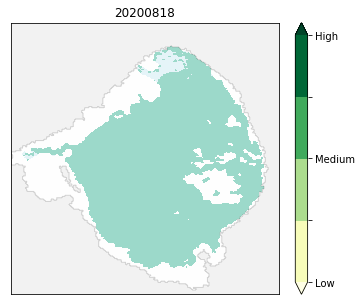

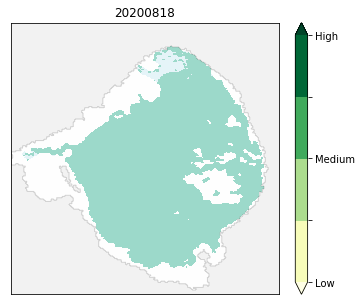

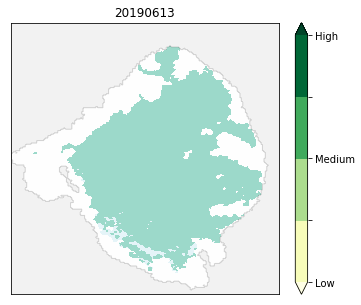

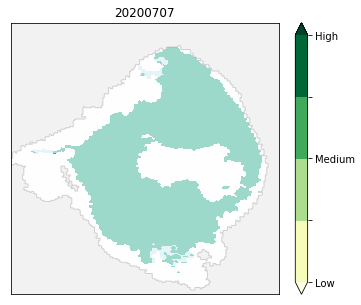

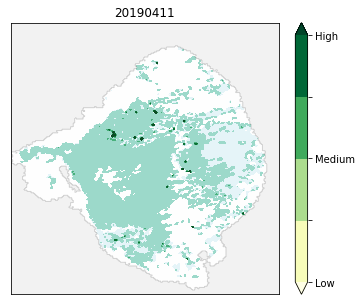

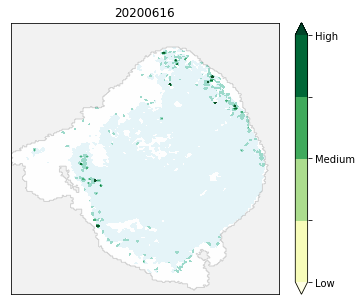

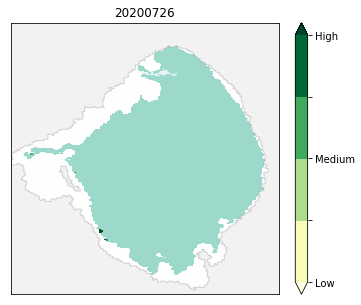

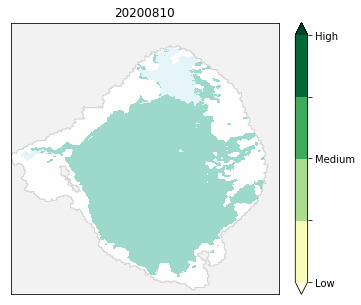

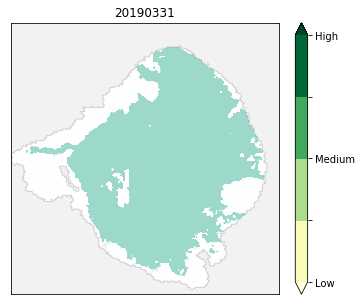

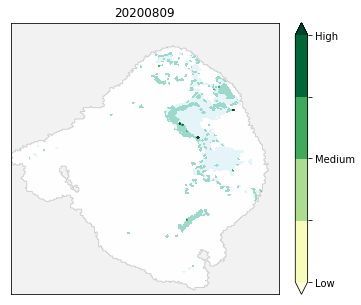

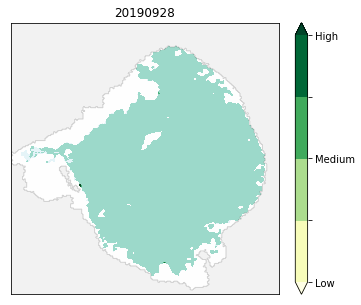

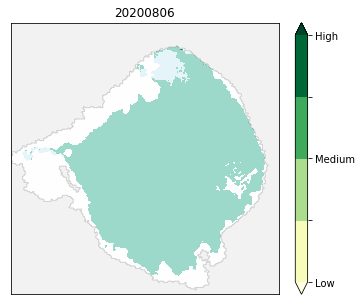

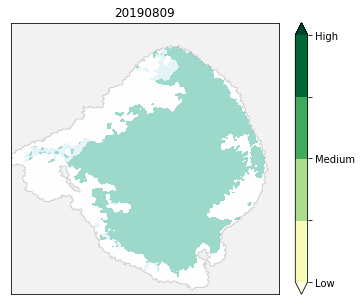

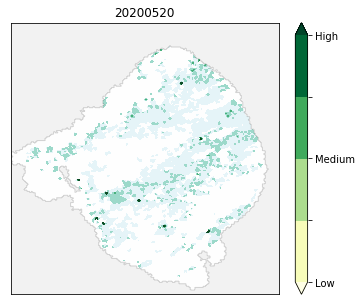

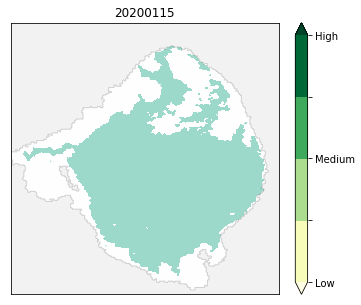

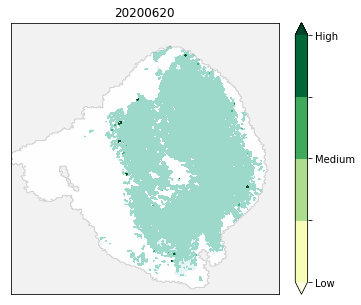

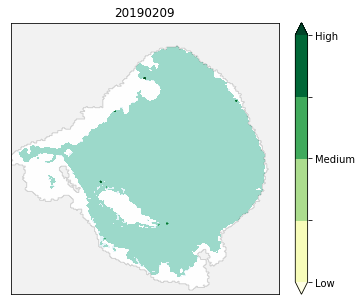

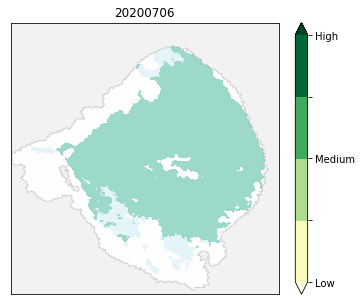

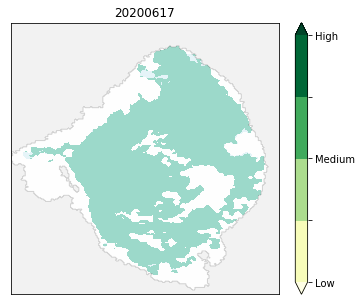

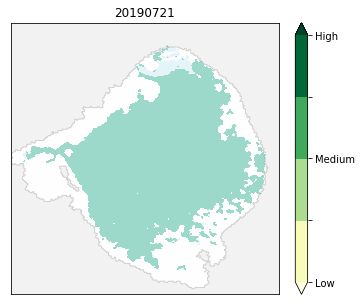

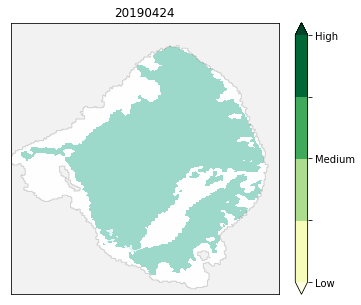

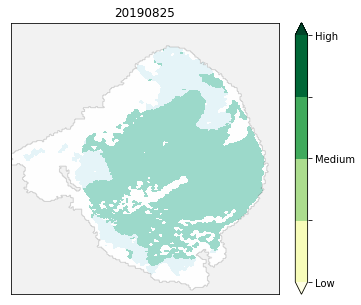

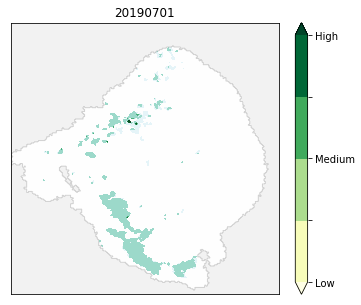

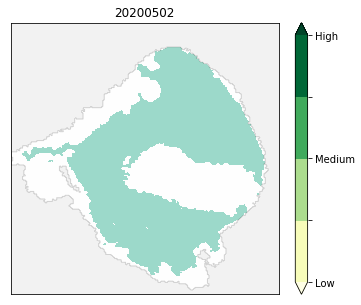

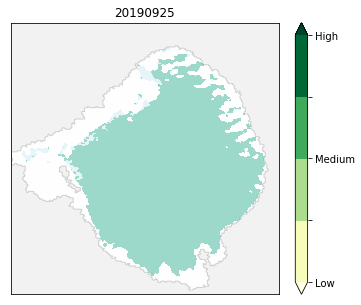

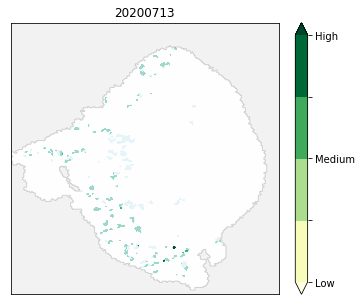

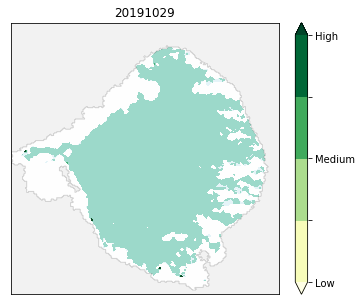

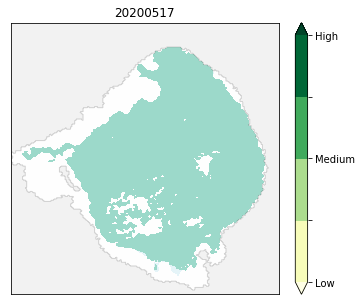

In [127]:
folder = "/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/"
files = os.listdir(folder)
for filename in files:
    if "S3B" in filename:
        path = f"/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/{filename}"
        data = netCDF4.Dataset(path)
        cloud_in_lake = cloud_in_lakes = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_in_lake_percent = np.sum(cloud_in_lake)/(216*191)
        if cloud_in_lake_percent < 0.2:
            CI_matrix = cal_CI_from_matrixdata(data)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(CI_matrix,0), cmap="BuGn", 
                        vmin=-20, vmax=60, extend='both', levels=np.linspace(vmin,vmax,5))
            #Use timepoint as the title for the graph:
            plt.title(filename[16:24])
            #plt.colorbar()
            cbar0 = plt.colorbar(cf0)
            cbar0.set_ticklabels(["Low",None,"Medium", None,"High"])
            plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.show()
        data.close()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract


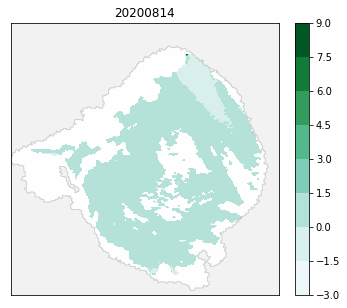

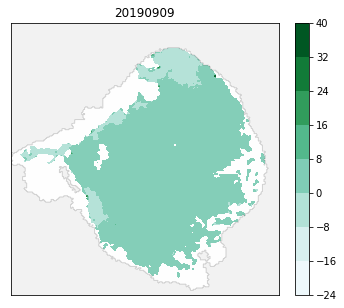

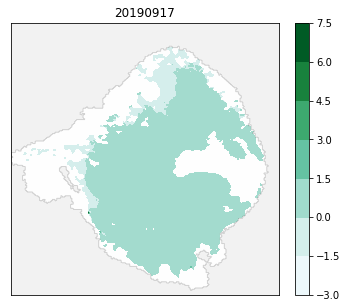

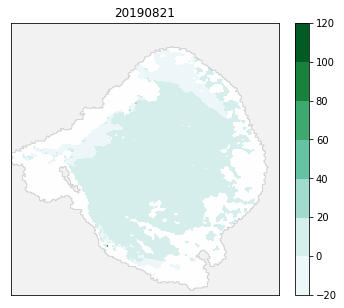

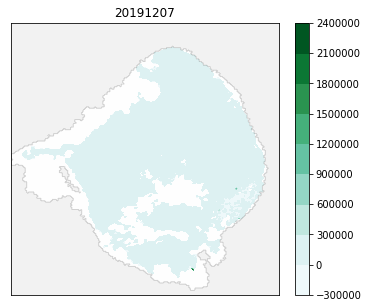

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


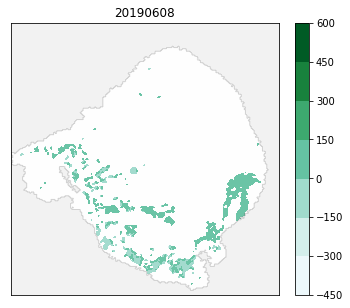

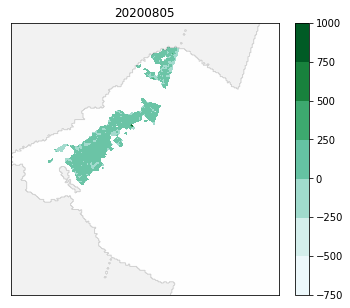

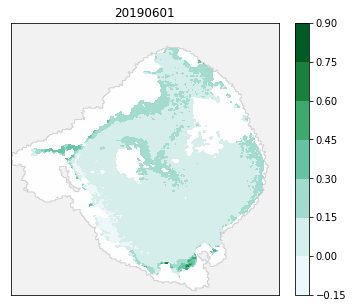

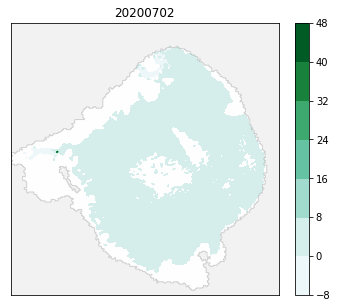

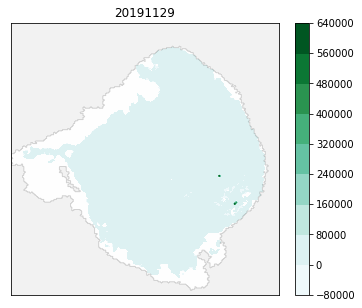

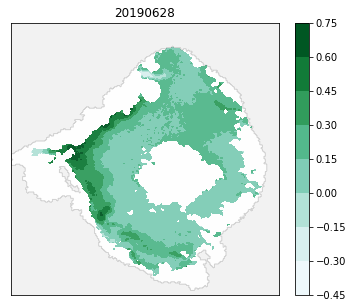

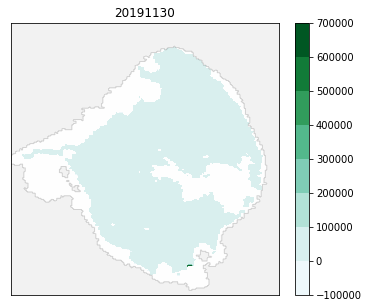

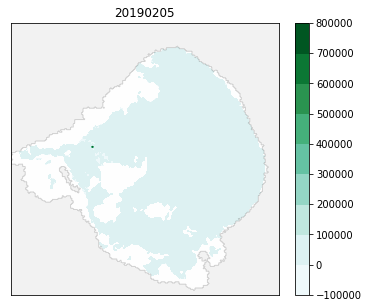

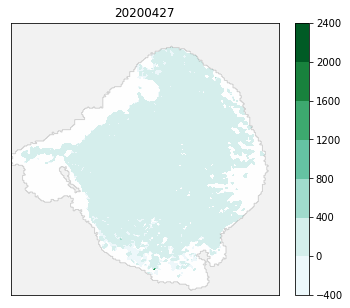

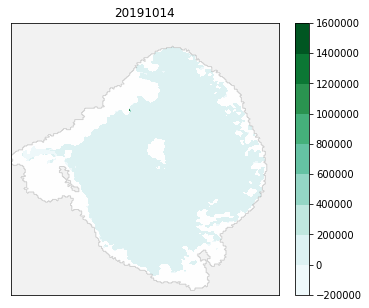

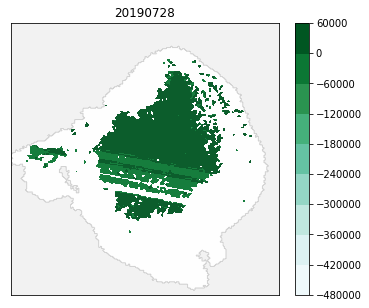

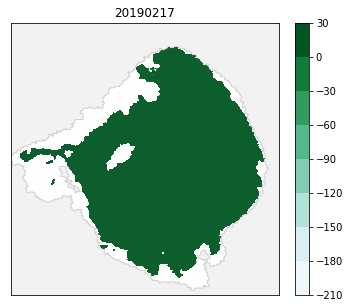

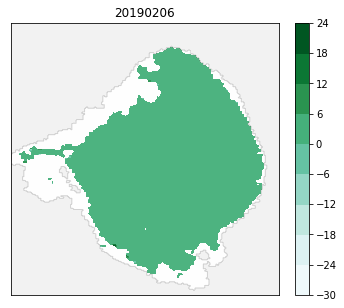

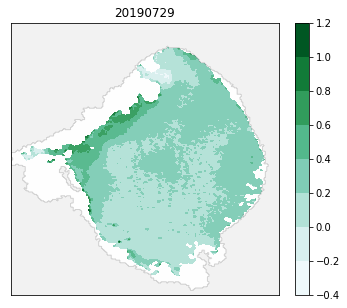

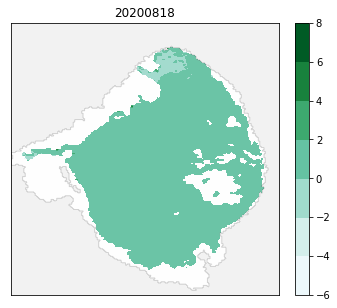

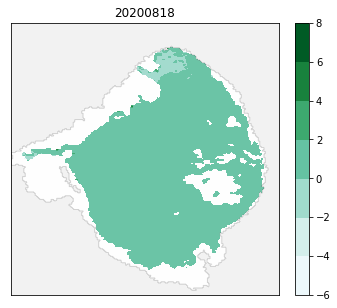

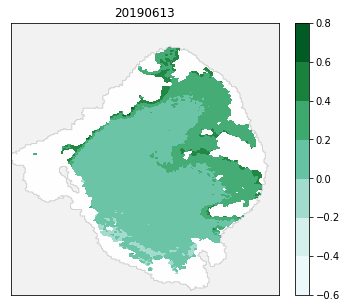

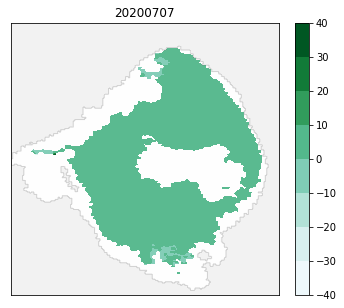

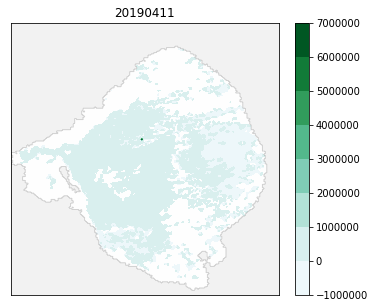

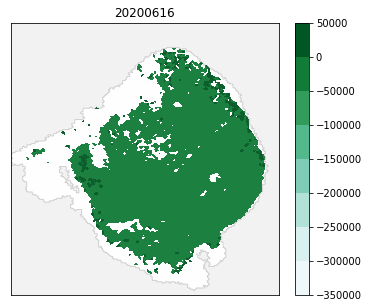

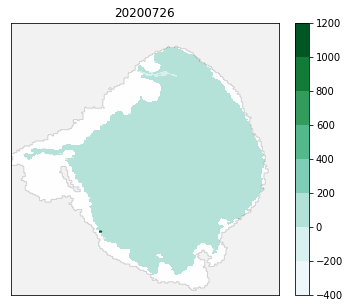

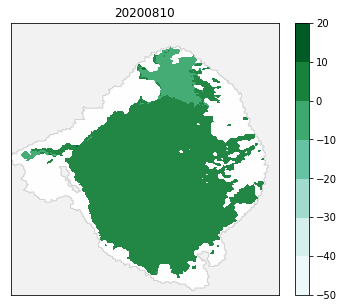

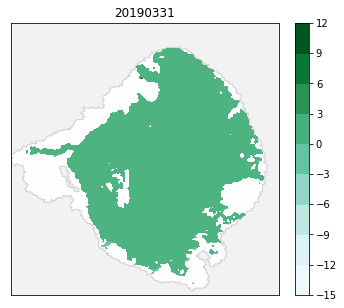

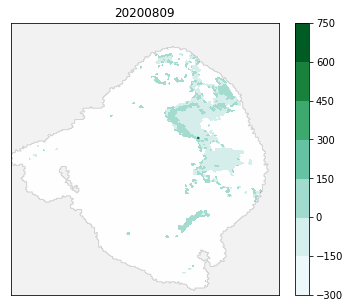

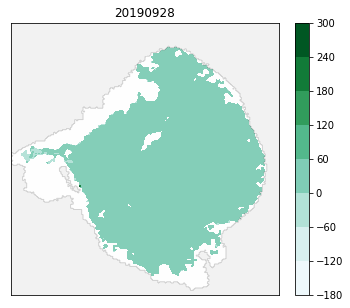

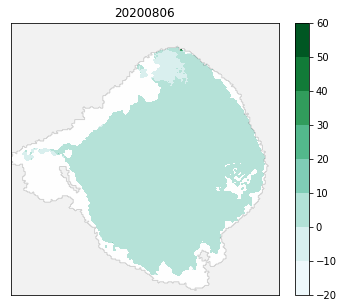

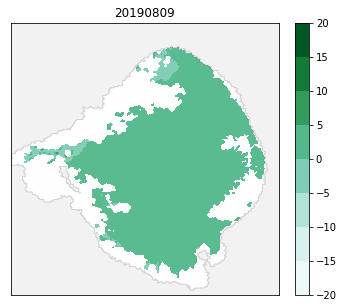

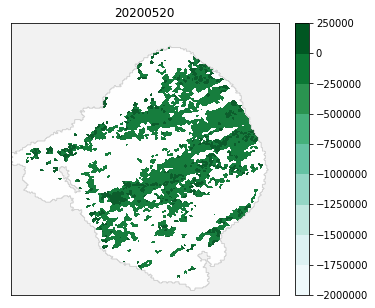

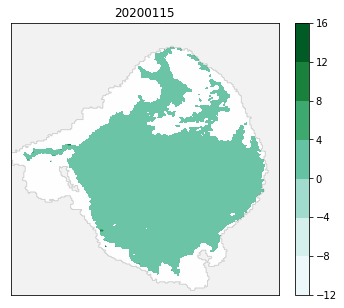

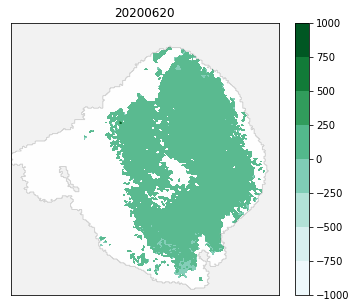

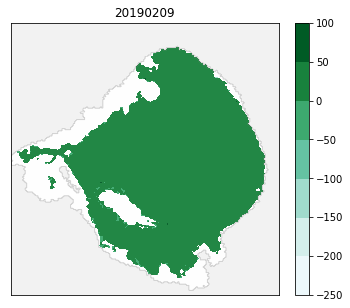

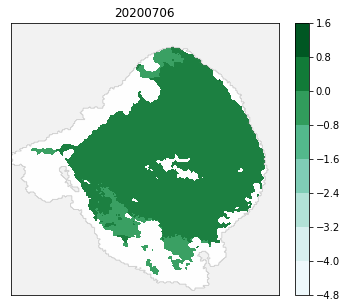

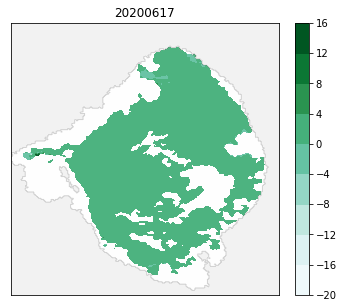

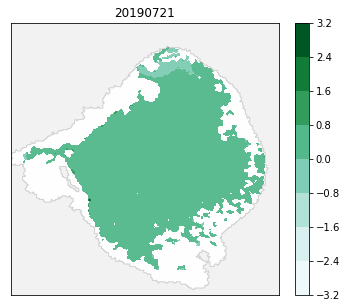

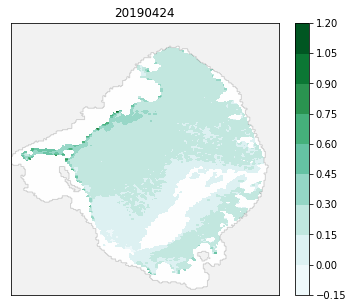

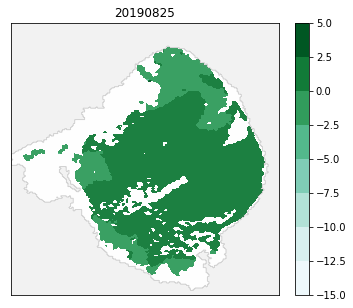

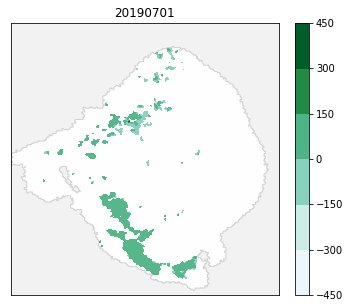

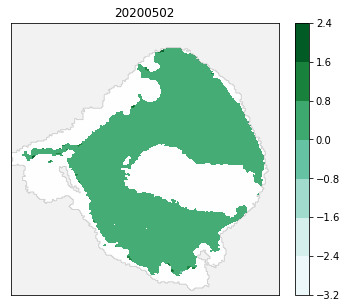

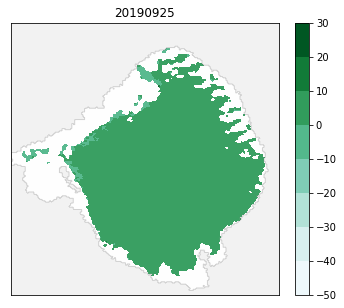

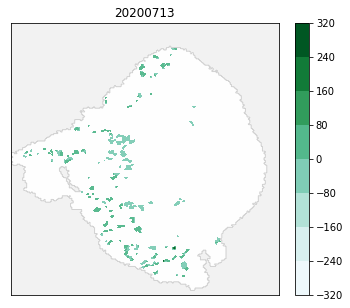

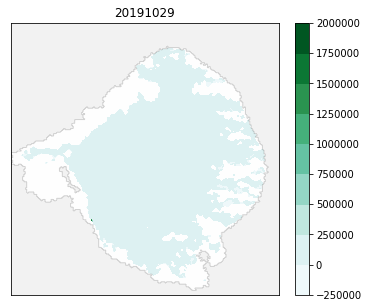

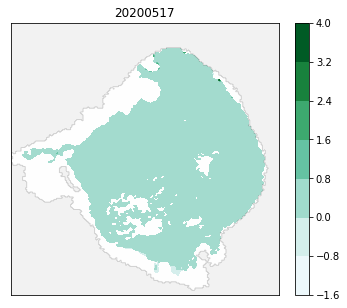

In [128]:
folder = "/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/"
files = os.listdir(folder)
for filename in files:
    if "S3B" in filename:
        path = f"/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/{filename}"
        data = netCDF4.Dataset(path)
        cloud_in_lake = cloud_in_lakes = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_in_lake_percent = np.sum(cloud_in_lake)/(216*191)
        if cloud_in_lake_percent < 0.2:
            CI_matrix = cal_CI_from_matrixdata(data)
            plt.figure(figsize=(6,5))
            plt.contourf(np.flip(CI_matrix,0), cmap="BuGn")
            #Use timepoint as the title for the graph:
            plt.title(filename[16:24])
            plt.colorbar()
            plt.contourf(np.flip(data.variables["LAND"],0), alpha=0.05, cmap='binary')
            plt.xticks([])
            plt.yticks([])
            plt.show()
        data.close()

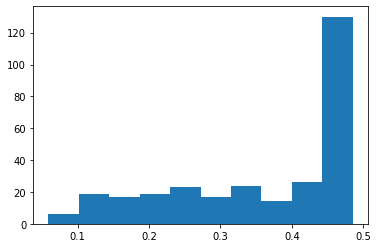

In [10]:
cloud_percents = []
for filename in files:
    if "S3B" in filename:
        path = f"/Users/quachhungvietnam/Desktop/Capstone/Sentinel_3_Data/S3_LO/{filename}"
        data = netCDF4.Dataset(path)
        #print(np.sum(data.variables["CLOUD"])/(216*191))
        cloud_in_lake = np.where(np.array(data.variables["LAND"])==1, 0, np.array(data.variables["CLOUD"]))
        cloud_percents.append(np.sum(cloud_in_lake)/(216*191))
plt.hist(cloud_percents)
plt.show()